# 一、导入数据

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_excel("input/data_.xlsx",index_col=0)

In [3]:
data_ = data.copy()
data_

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Thickness_classnum,Cell Size _small,Cell Size _medium,Cell Size _big,Thickness_class,Cell Size
ID,,,,,,,,,,,,,,,,
1275807,4,2,4,3,2,2,2,1,1,2,2,1,0,0,medium,small
1193683,1,1,2,1,3,1,1,1,1,2,1,1,0,0,thin,small
1170419,10,10,10,8,2,10,4,1,1,4,3,0,0,1,thick,big
1190386,4,6,6,5,7,6,7,7,3,4,2,0,1,0,medium,medium
1202125,4,1,1,1,2,1,3,1,1,2,2,1,0,0,medium,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493452,1,1,3,1,2,1,1,1,1,2,1,1,0,0,thin,small
1116132,6,3,4,1,5,2,3,9,1,4,2,1,0,0,medium,small
1133136,3,1,1,1,2,3,3,1,1,2,1,1,0,0,thin,small


In [4]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 645 entries, 1275807 to 1206314
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              645 non-null    int64 
 1   Uniformity of Cell Size      645 non-null    int64 
 2   Uniformity of Cell Shape     645 non-null    int64 
 3   Marginal Adhesion            645 non-null    int64 
 4   Single Epithelial Cell Size  645 non-null    int64 
 5   Bare Nuclei                  645 non-null    int64 
 6   Bland Chromatin              645 non-null    int64 
 7   Normal Nucleoli              645 non-null    int64 
 8   Mitoses                      645 non-null    int64 
 9   Class                        645 non-null    int64 
 10  Thickness_classnum           645 non-null    int64 
 11  Cell Size _small             645 non-null    int64 
 12  Cell Size _medium            645 non-null    int64 
 13  Cell Size _big               6

# 二、设置变量

In [5]:
features = data_.drop(columns=['Class','Thickness_class','Cell Size'])
features

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Thickness_classnum,Cell Size _small,Cell Size _medium,Cell Size _big
ID,,,,,,,,,,,,,
1275807,4,2,4,3,2,2,2,1,1,2,1,0,0
1193683,1,1,2,1,3,1,1,1,1,1,1,0,0
1170419,10,10,10,8,2,10,4,1,1,3,0,0,1
1190386,4,6,6,5,7,6,7,7,3,2,0,1,0
1202125,4,1,1,1,2,1,3,1,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493452,1,1,3,1,2,1,1,1,1,1,1,0,0
1116132,6,3,4,1,5,2,3,9,1,2,1,0,0
1133136,3,1,1,1,2,3,3,1,1,1,1,0,0


In [6]:
target = data_.Class.replace(to_replace = [2, 4], value = [0,1])
target

ID
1275807    0
1193683    0
1170419    1
1190386    1
1202125    0
          ..
493452     0
1116132    1
1133136    0
1158247    0
1206314    0
Name: Class, Length: 645, dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [8]:
transfer = StandardScaler()

In [9]:
features_ = transfer.fit_transform(features)

In [10]:
features_

array([[-0.17231198, -0.39676889,  0.23516391, ...,  0.62217102,
        -0.47319015, -0.32610809],
       [-1.22412169, -0.72153531, -0.43303311, ...,  0.62217102,
        -0.47319015, -0.32610809],
       [ 1.93130744,  2.20136243,  2.23975499, ..., -1.60727513,
        -0.47319015,  3.06646797],
       ...,
       [-0.52291521, -0.72153531, -0.76713162, ...,  0.62217102,
        -0.47319015, -0.32610809],
       [-1.22412169, -0.72153531, -0.76713162, ...,  0.62217102,
        -0.47319015, -0.32610809],
       [-1.22412169, -0.39676889, -0.0989346 , ...,  0.62217102,
        -0.47319015, -0.32610809]])

# 三、拆分数据集

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_features, test_features, train_target, test_target = train_test_split(
    features, target, 
    test_size = 145, random_state = 99)

In [13]:
print(train_features.shape)
print(train_target.shape)
print(test_features.shape)
print(test_target.shape)

(500, 13)
(500,)
(145, 13)
(145,)


# 四、建立模型

In [14]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
log = LogisticRegression()

In [17]:
log.fit(train_features, train_target)

LogisticRegression()

In [18]:
log.coef_

array([[ 0.72300497,  0.14988244,  0.25713252,  0.2039178 , -0.00387527,
         0.50532277,  0.32454077,  0.10414334,  0.59011341, -0.45836044,
         0.08008043, -0.19075256,  0.08879089]])

In [19]:
log.intercept_

array([-9.3093595])

In [20]:
test_predict = log.predict(test_features)
test_predict

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [21]:
test_proba = log.predict_proba(test_features)
test_proba

array([[9.97950792e-01, 2.04920822e-03],
       [2.38273723e-02, 9.76172628e-01],
       [1.22287895e-02, 9.87771211e-01],
       [9.98924031e-01, 1.07596935e-03],
       [3.30316916e-03, 9.96696831e-01],
       [1.27059549e-03, 9.98729405e-01],
       [9.97523739e-01, 2.47626094e-03],
       [8.08651868e-04, 9.99191348e-01],
       [9.97919750e-01, 2.08025050e-03],
       [1.16317745e-02, 9.88368226e-01],
       [3.50550961e-05, 9.99964945e-01],
       [9.87010376e-01, 1.29896238e-02],
       [3.37949374e-02, 9.66205063e-01],
       [9.98517869e-01, 1.48213082e-03],
       [9.93736801e-01, 6.26319895e-03],
       [8.74799556e-01, 1.25200444e-01],
       [9.97942852e-01, 2.05714849e-03],
       [9.98928188e-01, 1.07181220e-03],
       [9.51642661e-01, 4.83573385e-02],
       [9.98517869e-01, 1.48213082e-03],
       [7.60192455e-03, 9.92398075e-01],
       [9.50850248e-01, 4.91497520e-02],
       [9.98928188e-01, 1.07181220e-03],
       [9.97059374e-01, 2.94062557e-03],
       [9.815666

In [22]:
log.score(test_features,test_target)

0.9862068965517241

# 五、查看模型效能

In [23]:
from sklearn.metrics import confusion_matrix, roc_curve,accuracy_score

In [24]:
accuracy_score(test_target,test_predict)

0.9862068965517241

In [25]:
confusion_matrix(test_target,test_predict)

array([[100,   1],
       [  1,  43]])

In [26]:
import seaborn as sns

<Axes: >

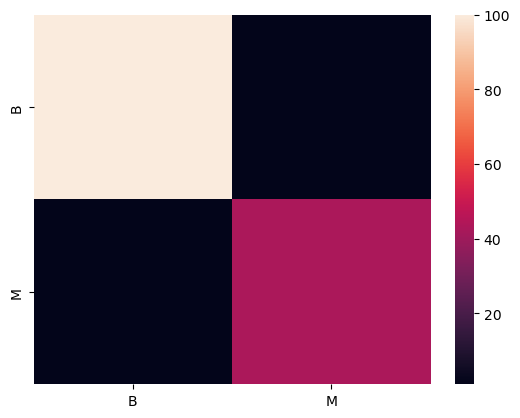

In [27]:
sns.heatmap(confusion_matrix(test_target,test_predict),
           xticklabels=['B','M'],
           yticklabels=['B','M'])

In [28]:
y_score = log.decision_function(test_features)

In [29]:
fpr, tpr, thresholds = roc_curve(test_target, y_score)

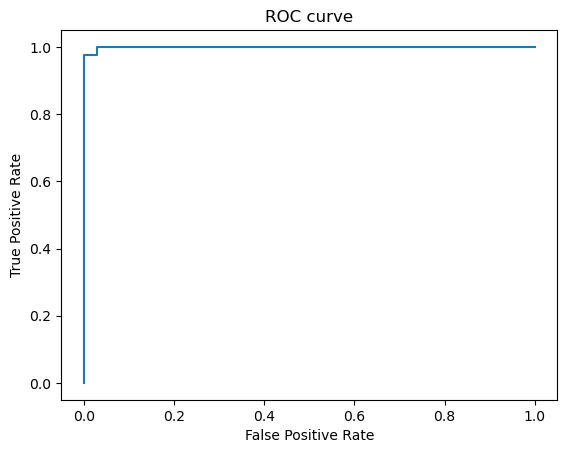

In [30]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [5]:
pip show scikit-learn

Name: scikit-learn
Version: 1.1.3
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /root/anaconda3/lib/python3.11/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn
Note: you may need to restart the kernel to use updated packages.


In [1]:
from sklearn.metrics import ConfusionMatrixDisplay, plot_roc_curve, plot_precision_recall_curve

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (/root/anaconda3/lib/python3.11/site-packages/sklearn/metrics/__init__.py)

In [32]:
plot_confusion_matrix(log, test_features, test_target)

NameError: name 'plot_confusion_matrix' is not defined

In [33]:
plot_roc_curve(log, test_features, test_target)

NameError: name 'plot_roc_curve' is not defined

In [34]:
plot_precision_recall_curve(log, test_features, test_target)

NameError: name 'plot_precision_recall_curve' is not defined

# 六、知识拓展

In [36]:
Cs = np.logspace(-3,2,200)

In [37]:
acc_=[]
coef_ = []
for C_ in Cs:
    log_l1 = LogisticRegression(penalty='l1',C = C_, solver='liblinear')
    log_l1.fit(train_features, train_target)
    coef_.append(log_l1.coef_)
    acc_.append(log_l1.score(test_features, test_target))

In [38]:
acc_

[0.696551724137931,
 0.696551724137931,
 0.696551724137931,
 0.696551724137931,
 0.696551724137931,
 0.696551724137931,
 0.696551724137931,
 0.696551724137931,
 0.696551724137931,
 0.696551724137931,
 0.696551724137931,
 0.696551724137931,
 0.30344827586206896,
 0.30344827586206896,
 0.30344827586206896,
 0.30344827586206896,
 0.30344827586206896,
 0.30344827586206896,
 0.30344827586206896,
 0.30344827586206896,
 0.30344827586206896,
 0.30344827586206896,
 0.30344827586206896,
 0.30344827586206896,
 0.30344827586206896,
 0.30344827586206896,
 0.30344827586206896,
 0.30344827586206896,
 0.30344827586206896,
 0.30344827586206896,
 0.30344827586206896,
 0.30344827586206896,
 0.30344827586206896,
 0.30344827586206896,
 0.30344827586206896,
 0.903448275862069,
 0.9310344827586207,
 0.9310344827586207,
 0.9517241379310345,
 0.9448275862068966,
 0.9379310344827586,
 0.9379310344827586,
 0.9379310344827586,
 0.9379310344827586,
 0.9517241379310345,
 0.9517241379310345,
 0.9517241379310345,
 0.

In [39]:
len(acc_)

200

In [40]:
coef_

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.00763732, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ]]),
 array([[0.        , 0.        , 0.        , 0

In [41]:
len(coef_)

200

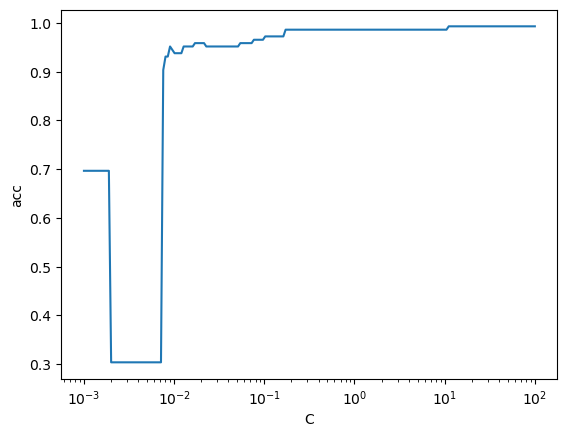

In [42]:
plt.plot(Cs, acc_)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('acc')
plt.show()

In [43]:
coef_ = np.array(coef_).reshape(200,13)

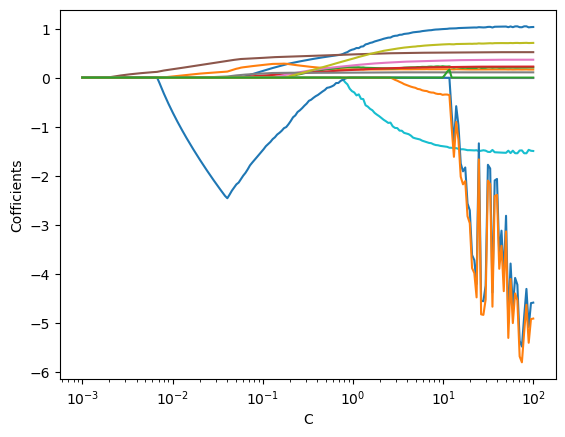

In [44]:
plt.plot(Cs, coef_)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Cofficients')
plt.show()

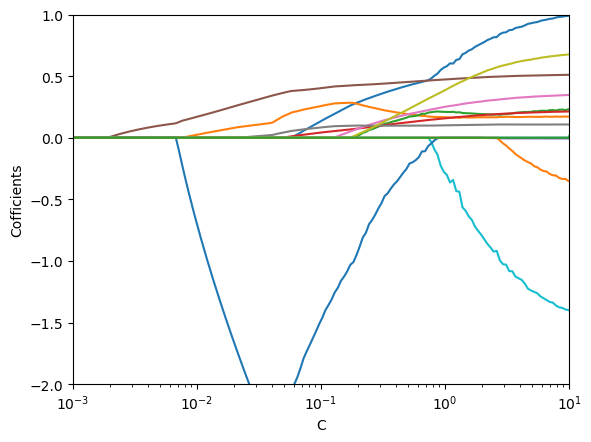

In [45]:
plt.plot(Cs, coef_)
plt.ylim([-2,1])
plt.xlim([10**-3,10])
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Cofficients')
plt.show()

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
poly_features = PolynomialFeatures(degree=2)

In [48]:
train_features_ = poly_features.fit_transform(train_features)

In [49]:
train_features

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Thickness_classnum,Cell Size _small,Cell Size _medium,Cell Size _big
ID,,,,,,,,,,,,,
369565,4,1,1,1,3,1,1,1,1,2,1,0,0
529329,10,10,10,10,10,10,4,10,10,3,0,0,1
1183596,3,1,3,1,3,4,1,1,1,1,1,0,0
1255384,3,2,2,3,2,3,3,1,1,1,1,0,0
563649,8,8,8,1,2,7,6,10,1,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466906,1,1,1,1,2,1,1,1,1,1,1,0,0
1167439,2,3,4,4,2,5,2,5,1,1,1,0,0
877943,3,10,3,10,6,10,5,1,4,1,1,0,0


In [50]:
train_features_

array([[ 1.,  4.,  1., ...,  0.,  0.,  0.],
       [ 1., 10., 10., ...,  0.,  0.,  1.],
       [ 1.,  3.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 1.,  3., 10., ...,  0.,  0.,  0.],
       [ 1.,  3.,  1., ...,  0.,  0.,  0.],
       [ 1.,  6.,  3., ...,  0.,  0.,  0.]])

In [51]:
train_features_.shape

(500, 105)

In [57]:
log_ = LogisticRegression(max_iter = 10000)

In [58]:
log_.fit(train_features_, train_target)

LogisticRegression(max_iter=10000)

In [56]:
test_features_ = poly_features.transform(test_features)
log_.score(test_features_,test_target)

0.9379310344827586